In [1]:
# Importing the necessary libraries:
import pandas as pds
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading the datasets into dataframes:
df_training = pds.read_csv('mushroom_train.csv')
df_testing = pds.read_csv('mushroom_test.csv')

# **Exploratory Data Analysis**

In [3]:
df_training.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
0,4.98,c,i,y,f,a,c,n,6.04,6.21,w,f,f,d,a,p
1,2.84,x,y,y,f,a,c,w,5.66,3.55,y,t,r,h,u,p
2,11.44,x,y,y,f,a,c,w,7.03,25.29,n,t,e,d,w,e
3,8.77,s,t,r,t,d,c,g,4.44,13.61,r,f,f,d,a,p
4,7.55,x,d,n,t,p,c,y,8.41,18.44,y,f,f,d,a,e


In [4]:
df_training.describe()

,cap-diameter,stem-height,stem-width
count,42748.000000,42748.000000,42748.000000
mean,6.714149,6.583224,12.117692
std,5.220008,3.368333,10.004874
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.180000
50%,5.865000,5.960000,10.200000
75%,8.530000,7.750000,16.540000
max,62.340000,33.920000,103.910000


In [5]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42748 entries, 0 to 42747
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          42748 non-null  float64
 1   cap-shape             42748 non-null  object 
 2   cap-surface           42748 non-null  object 
 3   cap-color             42748 non-null  object 
 4   does-bruise-or-bleed  42748 non-null  object 
 5   gill-attachment       42748 non-null  object 
 6   gill-spacing          42748 non-null  object 
 7   gill-color            42748 non-null  object 
 8   stem-height           42748 non-null  float64
 9   stem-width            42748 non-null  float64
 10  stem-color            42748 non-null  object 
 11  has-ring              42748 non-null  object 
 12  ring-type             42748 non-null  object 
 13  habitat               42748 non-null  object 
 14  season                42748 non-null  object 
 15  class              

In [6]:
df_testing.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
0,13.95,s,e,g,f,d,c,w,7.67,22.22,w,f,f,d,a,e
1,17.79,s,k,n,f,d,c,y,6.39,36.42,n,f,f,d,u,p
2,1.50,x,k,n,f,a,c,n,5.30,1.44,n,f,f,d,w,p
3,15.33,x,t,n,t,d,c,b,5.16,26.60,n,f,f,g,a,p
4,15.96,p,y,w,f,a,c,w,23.57,19.51,n,t,m,m,a,e


In [7]:
df_testing.describe()

,cap-diameter,stem-height,stem-width
count,18321.000000,18321.000000,18321.000000
mean,6.779834,6.577604,12.223417
std,5.367869,3.374032,10.107991
min,0.440000,0.000000,0.000000
25%,3.490000,4.630000,5.260000
50%,5.860000,5.940000,10.160000
75%,8.580000,7.720000,16.660000
max,58.300000,33.720000,102.480000


In [8]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18321 entries, 0 to 18320
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          18321 non-null  float64
 1   cap-shape             18321 non-null  object 
 2   cap-surface           18321 non-null  object 
 3   cap-color             18321 non-null  object 
 4   does-bruise-or-bleed  18321 non-null  object 
 5   gill-attachment       18321 non-null  object 
 6   gill-spacing          18321 non-null  object 
 7   gill-color            18321 non-null  object 
 8   stem-height           18321 non-null  float64
 9   stem-width            18321 non-null  float64
 10  stem-color            18321 non-null  object 
 11  has-ring              18321 non-null  object 
 12  ring-type             18321 non-null  object 
 13  habitat               18321 non-null  object 
 14  season                18321 non-null  object 
 15  class              

In [9]:
df_training.isnull().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
class                   0
dtype: int64

In [10]:
df_testing.isnull().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
class                   0
dtype: int64

The datasets do not have any null/void values.

In [11]:
# Checking whether the training dataset is standardized: 
only_numerics = df_training.select_dtypes(include = [np.number]).columns # Accessing the indices of the columns that have only numbers.
standardized = np.isclose(df_training[only_numerics].mean(), 0).all() and np.isclose(df_training[only_numerics].std(), 1).all() # Standardized data should have mean = 0 and standard deviation = 1

if standardized == True:
  print('The training dataset is standardized')

else:
  print('The training dataset is not standardized')

The training dataset is not standardized


**Standardizing the training dataset**

In [12]:
standardizer = StandardScaler()
standardizer.fit(df_training[only_numerics])
df_std = pds.DataFrame(standardizer.transform(df_training[only_numerics]), columns = df_training[only_numerics].columns)
# Combining the standardized dataframe with the rest of the columns:
non_numeric = df_training.select_dtypes(exclude = [np.number]).columns # Accessing the indices of the columns that have data other than numbers.
df_combined = pds.concat([df_std, df_training[non_numeric]], axis = 1)
#df_combined.head()

,cap-diameter,stem-height,stem-width,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season,class
0,-0.332216,-0.161276,-0.590488,c,i,y,f,a,c,n,w,f,f,d,a,p
1,-0.742182,-0.274093,-0.856362,x,y,y,f,a,c,w,y,t,r,h,u,p
2,0.905345,0.132642,1.316604,x,y,y,f,a,c,w,n,t,e,d,w,e
3,0.393845,-0.636294,0.149160,s,t,r,t,d,c,g,r,f,f,d,a,p
4,0.160126,0.542345,0.631930,x,d,n,t,p,c,y,y,f,f,d,a,e


# **Training phase of the system**

A system that outputs class assignments (S0, S1) at random with probability N0 / N and N1 / N, respectively; 𝑁i is the number of training data points with class label Si, and N is the total number of training data points.

In [13]:
# Defining the ratio constants:
N = len(df_combined) # Number of rows present in the training dataset.
N_0 = len(df_combined[df_combined['class'] == 'p']) # Number of datapoints present in class 'p'.
N_1 = len(df_combined[df_combined['class'] == 'e']) # Number of datapoints present in class 'e'.

# Computing the probabilities: 
S_0 = N_0 / N
S_1 = N_1 / N

# **Testing phase of the system**

In [14]:
length = len(df_testing)
# Randomly assigning the class labels to the testing datapoints using S0 & S1:
df_testing['class_predicted'] = np.random.choice(['p', 'e'], size = length, p = [S_0, S_1])

**Testing accuracy**

In [15]:
# Calculating the testing accuracy:
testing_accuracy = df_testing['class'] == df_testing['class_predicted']
print(testing_accuracy)

0         True
1         True
2         True
3        False
4        False
         ...  
18316     True
18317     True
18318    False
18319     True
18320     True
Length: 18321, dtype: bool


In [19]:
print(f"The accuracy during the testing phase = {testing_accuracy.mean() * 100}%")

The accuracy during the testing phase = 50.83237814529774%


The test accuracy of this trivial system is low.

**F1 score of the system**

In [17]:
# Computing the F1 score:
F1_score_p = f1_score(df_testing['class'], df_testing['class_predicted'], pos_label = 'p')
F1_score_e = f1_score(df_testing['class'], df_testing['class_predicted'], pos_label = 'e')
print(f'The F1 score for class p = {F1_score_p} and for class e = {F1_score_e}')

The F1 score for class p = 0.5586909660983735 and for class e = 0.4449784349969193


Similarly, the F1 score is also very low.

**Confusion matrix of the system**

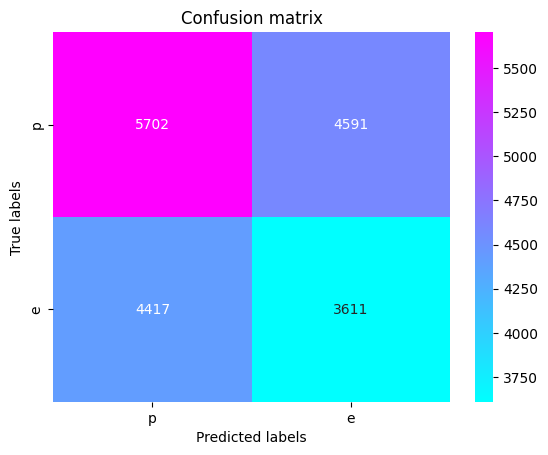

In [18]:
matrix = confusion_matrix(df_testing['class'], df_testing['class_predicted'], labels = ['p', 'e'])
sns.heatmap(matrix, annot = True, fmt = 'd', cmap = 'cool', xticklabels = ['p', 'e'], yticklabels = ['p', 'e'])
plt.title("Confusion matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

The number of true positives is very low and the number of false negative is low. However, the false positives and true negatives are relatively high indicating that the trivial system is not accurate in classification.